In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = pd.read_csv('C:/Users/Hazman/Desktop/iris.csv')

In [4]:
print("First five rows")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type") 
print(iris["Name"].value_counts())
print("*********")
print(iris.describe())

First five rows
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
*********
columns Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Name, dtype: int64
*********
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


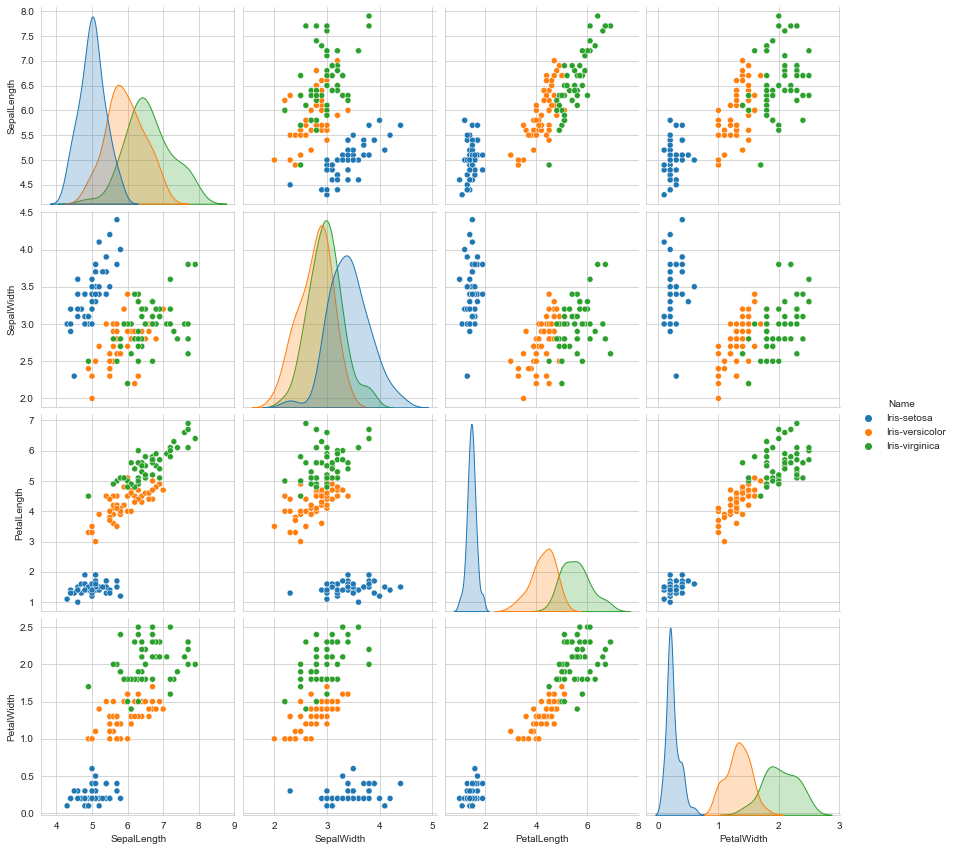

In [6]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Name",size=3);
plt.show()

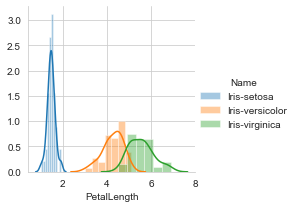

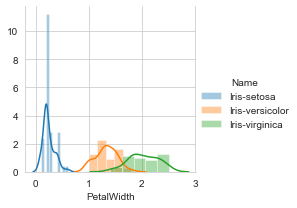

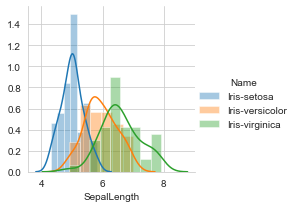

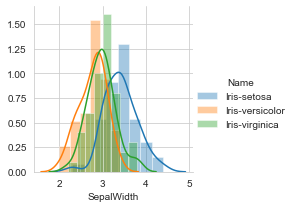

In [7]:
iris_setosa=iris.loc[iris["Name"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Name"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Name"]=="Iris-versicolor"]
sns.FacetGrid(iris,hue="Name",size=3).map(sns.distplot,"PetalLength").add_legend()
sns.FacetGrid(iris,hue="Name",size=3).map(sns.distplot,"PetalWidth").add_legend()
sns.FacetGrid(iris,hue="Name",size=3).map(sns.distplot,"SepalLength").add_legend()
sns.FacetGrid(iris,hue="Name",size=3).map(sns.distplot,"SepalWidth").add_legend()
plt.show()

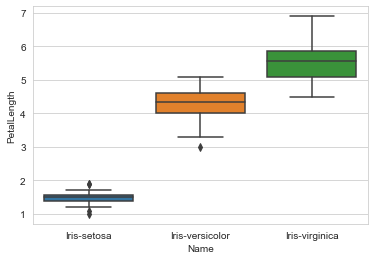

In [8]:
sns.boxplot(x="Name",y="PetalLength",data=iris)
plt.show()

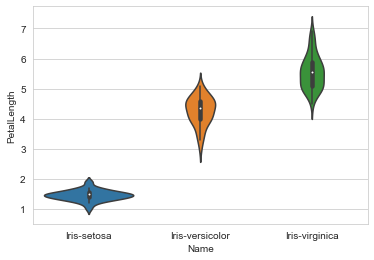

In [9]:
sns.violinplot(x="Name",y="PetalLength",data=iris)
plt.show()

In [10]:
iris.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

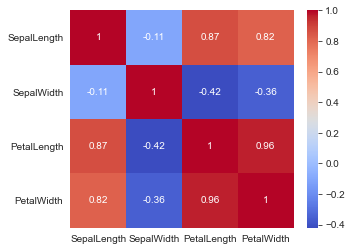

In [11]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
iris['Name'] = le.fit_transform(iris['Name'])
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
from sklearn.model_selection import train_test_split
# train - 67
# test - 33
X = iris.drop(columns=['Name'])
Y = iris['Name']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [15]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [16]:
model.fit(x_train, y_train)
x = model.fit(x_train, y_train)

In [17]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  98.0


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predict = x.predict(x_test)
acc = accuracy_score(y_test,y_predict)
classreport = classification_report(y_test,y_predict)
confMat = confusion_matrix(y_test,y_predict)

In [19]:
print('\n****************************')
print('The accuracy: {}'.format(acc))
print('The Classification Report:\n {}'.format(classreport))
print('The Confusion Matrix:\n {}'.format(confMat))


****************************
The accuracy: 0.98
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

The Confusion Matrix:
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
